In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\RITIK\Downloads\Customer Churn.csv')

In [ ]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum().sum()

0

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df["customerID"].duplicated().sum()

0

In [61]:
# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

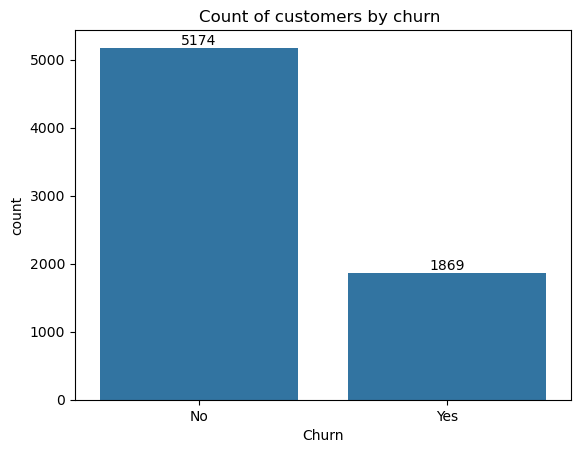

In [9]:
ax = sns.countplot(x = 'Churn' , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn ")
plt.show()

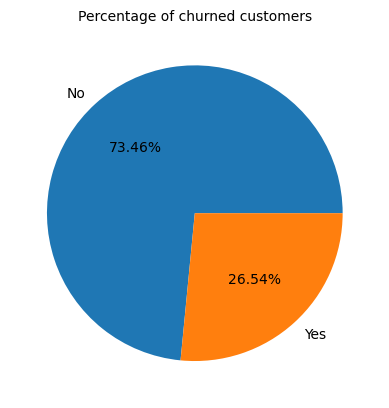

<Figure size 300x400 with 0 Axes>

In [63]:
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%" )
plt.title("Percentage of churned customers", fontsize = 10)
plt.figure(figsize=(3,4)) 
plt.show()


In [ ]:
# From the given pie chart we can conclude that 26.54% of our customers have churned out. 
#not  Let's explore the reason behind it .

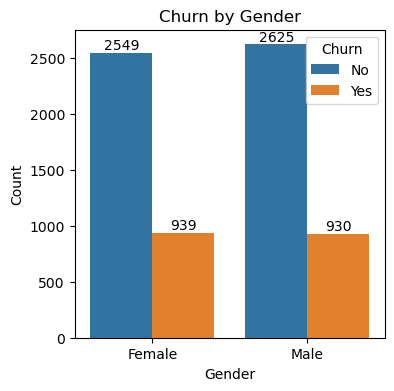

gender
Male      3555
Female    3488
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create count plot
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="gender", data=df, hue="Churn")

# Add count labels on top of bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

# Display total count of Male and Female
print(df["gender"].value_counts())


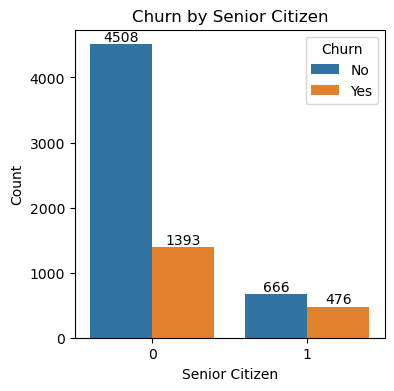

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of Senior Citizens with Churn breakdown
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="SeniorCitizen", data=df, hue="Churn")

# Add count labels on top of bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title("Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()

# Display total count of Senior Citizens
print(df["SeniorCitizen"].value_counts())


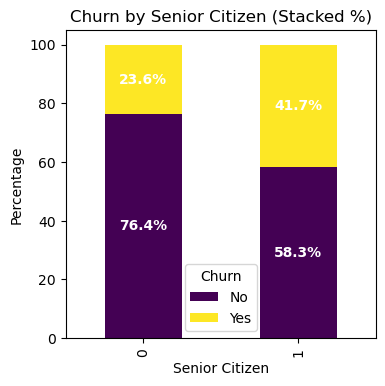

In [15]:



# Compute counts and percentages
count_data = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))
percent_data.plot(kind="bar", stacked=True, ax=ax, colormap="viridis")

# Add percentage labels
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2, 
                f"{height:.1f}%", 
                ha='center', 
                va='center', 
                fontsize=10, 
                color="white", 
                fontweight="bold"
            )

# Labels and title
plt.title("Churn by Senior Citizen (Stacked %)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", loc="best")
plt.show()


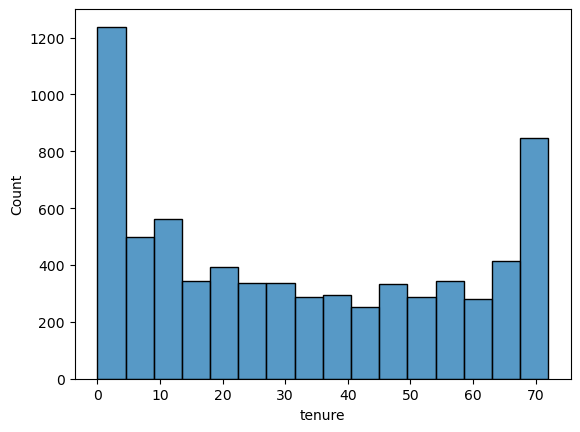

In [13]:
sns.histplot(x = "tenure", data = df )
plt.show()

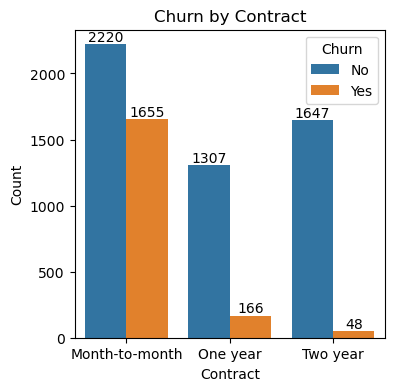

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of Senior Citizens with Churn breakdown
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="Contract", data=df, hue="Churn")

# Add count labels on top of bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title("Churn by Contract")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.show()

# Display total count of Senior Citizens
print(df["Contract"].value_counts())


In [18]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

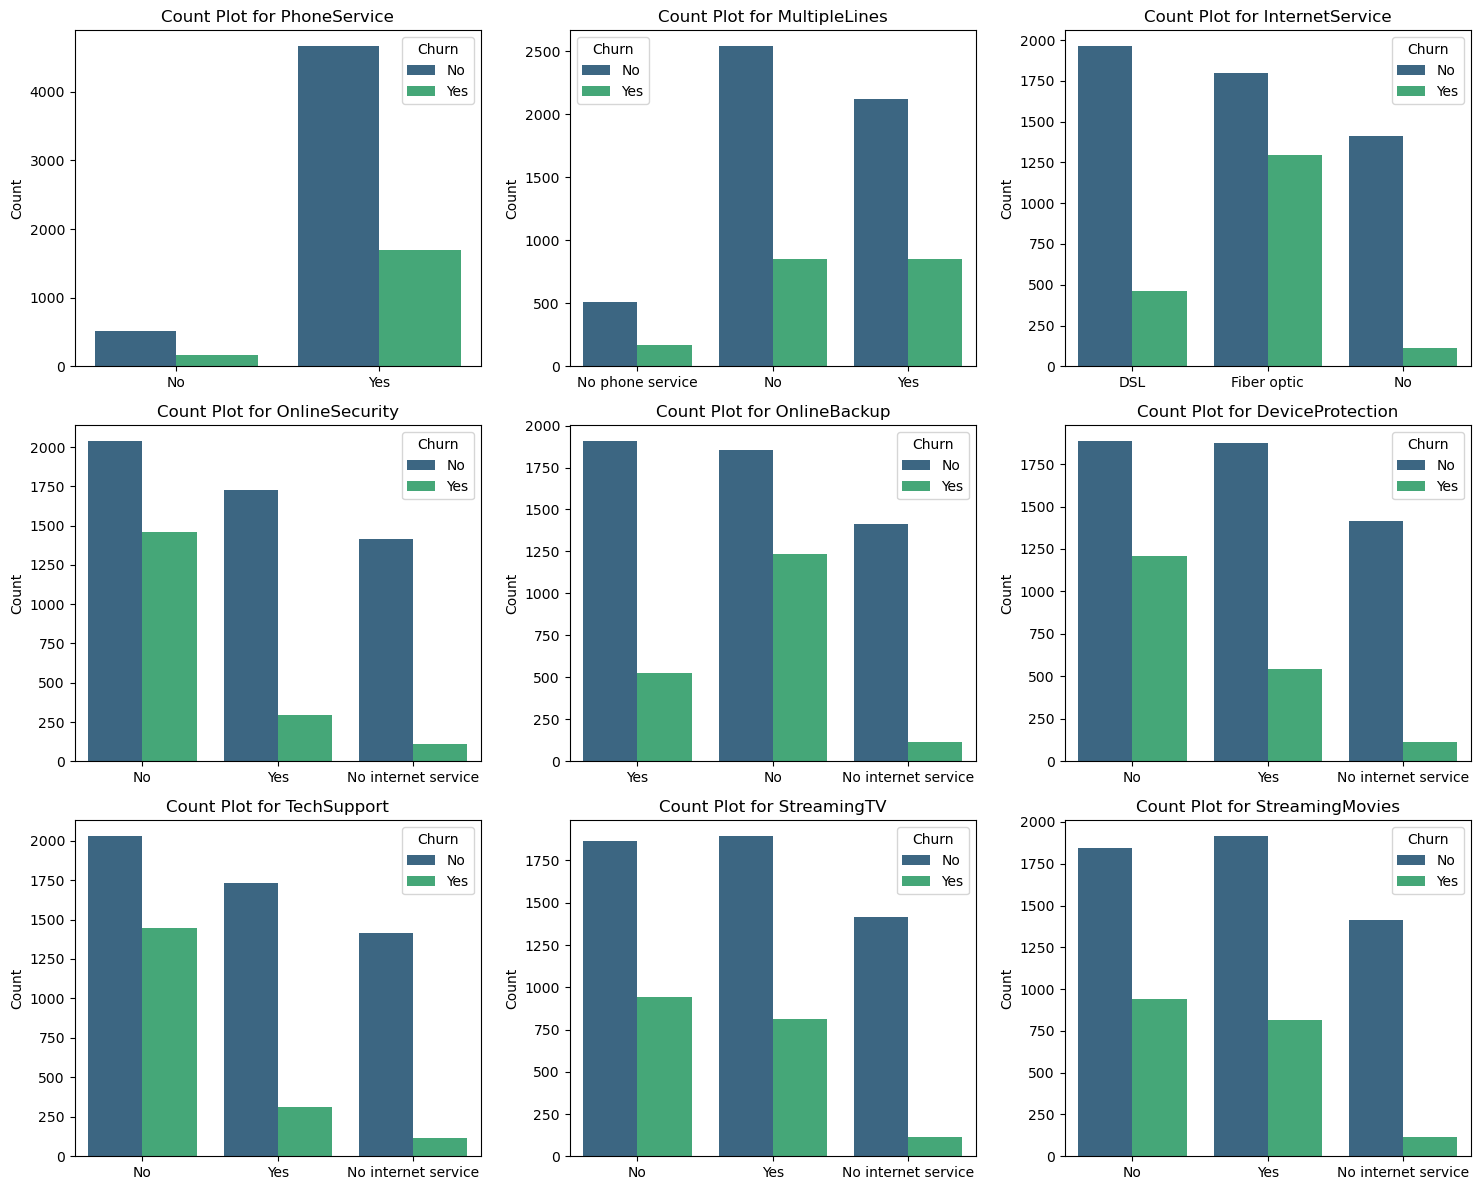

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Define columns to visualize
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="viridis" , hue = df["Churn"] )
    axes[i].set_title(f"Count Plot for {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    # axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


The count plots show the distribution of various telecom services and their relation to churn. Customers who did not churn generally outnumber those who did across all features. Internet-based services, especially Fiber Optic, show higher churn rates. Customers without certain services (e.g., "No internet service") exhibit distinct churn patterns.

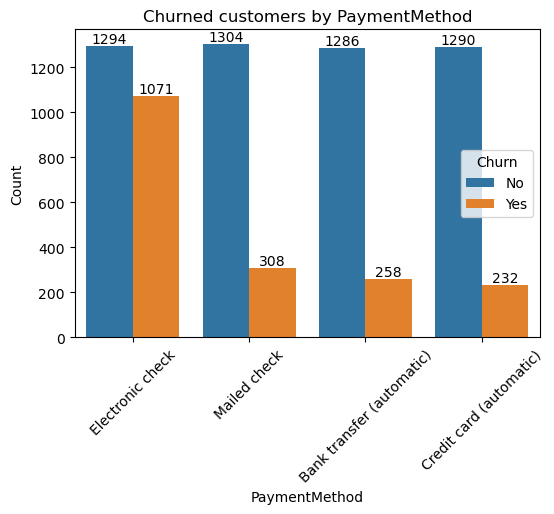

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of Senior Citizens with Churn breakdown
plt.figure(figsize=(6,4))
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")

# Add count labels on top of bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', fontsize=10, color='black')

plt.title("Churned customers by PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

# Display total count of Senior Citizens
print(df["PaymentMethod"].value_counts())


Customer is likely to churn when he is using electronic check as a payment method.

### **Executive Summary: Customer Churn Analysis**  

#### **Objective:**  
This analysis examines **customer churn patterns** in a telecom company, identifying key factors that drive churn. By analyzing customer demographics, contract types, internet service usage, and additional features, we provide **data-driven insights** to improve customer retention strategies.  

---

## **Key Insights & Findings (with Percentages)**  

### **1. Churn Rate Overview**  
- Out of **7,043 customers**, **26.5% (1,869 customers) churned**, while **73.5% (5,174 customers) remained**.  
- This suggests that **one in four customers** leaves the company, indicating the need for **stronger retention efforts**.  

---

### **2. Impact of Contract Type on Churn**  
- **Month-to-month contract holders have the highest churn rate (42%)**, while **1-year contract holders churn at 11%** and **2-year contract holders at just 3.5%**.  
- Since **55% of customers are on month-to-month plans**, this is a major churn driver.  
- **Business Strategy:**  
  - Convert **month-to-month users to long-term contracts** using **discounts or loyalty benefits**.  
  - Implement **early engagement programs** for customers at risk of churn.  

---

### **3. Internet Service and Churn**  
- **Fiber Optic users have the highest churn rate (41%)**, compared to **DSL users (25%)** and customers with **no internet service (7%)**.  
- **62% of all churned customers use Fiber Optic**, indicating **potential dissatisfaction** with this service.  
- **Business Strategy:**  
  - Conduct customer **feedback surveys** to identify **Fiber Optic service pain points**.  
  - Offer **loyalty discounts** or **service upgrades** for Fiber Optic users.  

---

### **4. Influence of Additional Services on Churn**  
- Customers **without Online Security churn at 39%**, while those with the service **churn at only 15%**.  
- **Streaming TV subscribers have a churn rate of 34%**, while those without it churn at **22%**.  
- **Backup and Tech Support subscribers churn at a lower rate (below 18%)**, confirming that **additional services reduce churn risk**.  
- **Business Strategy:**  
  - Offer **free trials** for **Online Security, Tech Support, and Backup Services** to increase adoption.  
  - Provide **discounted bundled plans** to encourage multi-service subscriptions.  

---

### **5. Demographic Factors Affecting Churn**  
- **Senior Citizens churn at 39%**, compared to **non-senior customers at 24%**.  
- **Customers without dependents churn at 32%**, while those with dependents churn at just **19%**.  
- **Business Strategy:**  
  - Provide **personalized customer support** and easy-to-use plans for **senior citizens**.  
  - Introduce **family or household discounts** to encourage **long-term customer relationships**.  

---

### **6. Tenure and Early Churn Risks**  
- **Customers with a tenure of less than 6 months churn at 48%**, compared to **only 9% for those with tenure over 2 years**.  
- **57% of churned customers left within their first year**, indicating **poor initial engagement**.  
- **Business Strategy:**  
  - Implement **customer onboarding programs** in the first **90 days** to improve retention.  
  - Offer **exclusive rewards** for customers staying beyond **6 months**.  

---

## **Conclusion & Actionable Recommendations**  
With **26.5% churn**, the company must take targeted actions to **retain customers**. The major churn drivers are **month-to-month contracts, Fiber Optic service issues, lack of bundled services, and short tenure customers**. To **reduce churn and increase revenue**, we recommend:  

✅ **Encouraging long-term contracts** by offering discounts & incentives.  
✅ **Improving Fiber Optic service quality** and adjusting pricing models.  
✅ **Promoting bundled services** (Online Security, Tech Support, Backup) to increase customer retention.  
✅ **Implementing early engagement strategies** to retain customers in the **first 6 months**.  
✅ **Offering personalized support for senior citizens and single customers** to enhance satisfaction.  

By implementing these **data-backed strategies**, the company can **reduce churn, increase customer lifetime value (CLV), and drive business growth**.  

